# Customer Churn Analysis

Problem Statement:


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there is no null value in the data set so we are good to go

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
from sklearn.preprocessing import LabelEncoder

data = data.copy()
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])
data.head()   

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


# feature variable

In [9]:
x=data.drop(["Churn"],axis=1)
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597
7039,1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698
7040,3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,2994
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660


# target variable

In [10]:
y=data["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# checking correlation

In [11]:
data.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.006266,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357,-0.289309


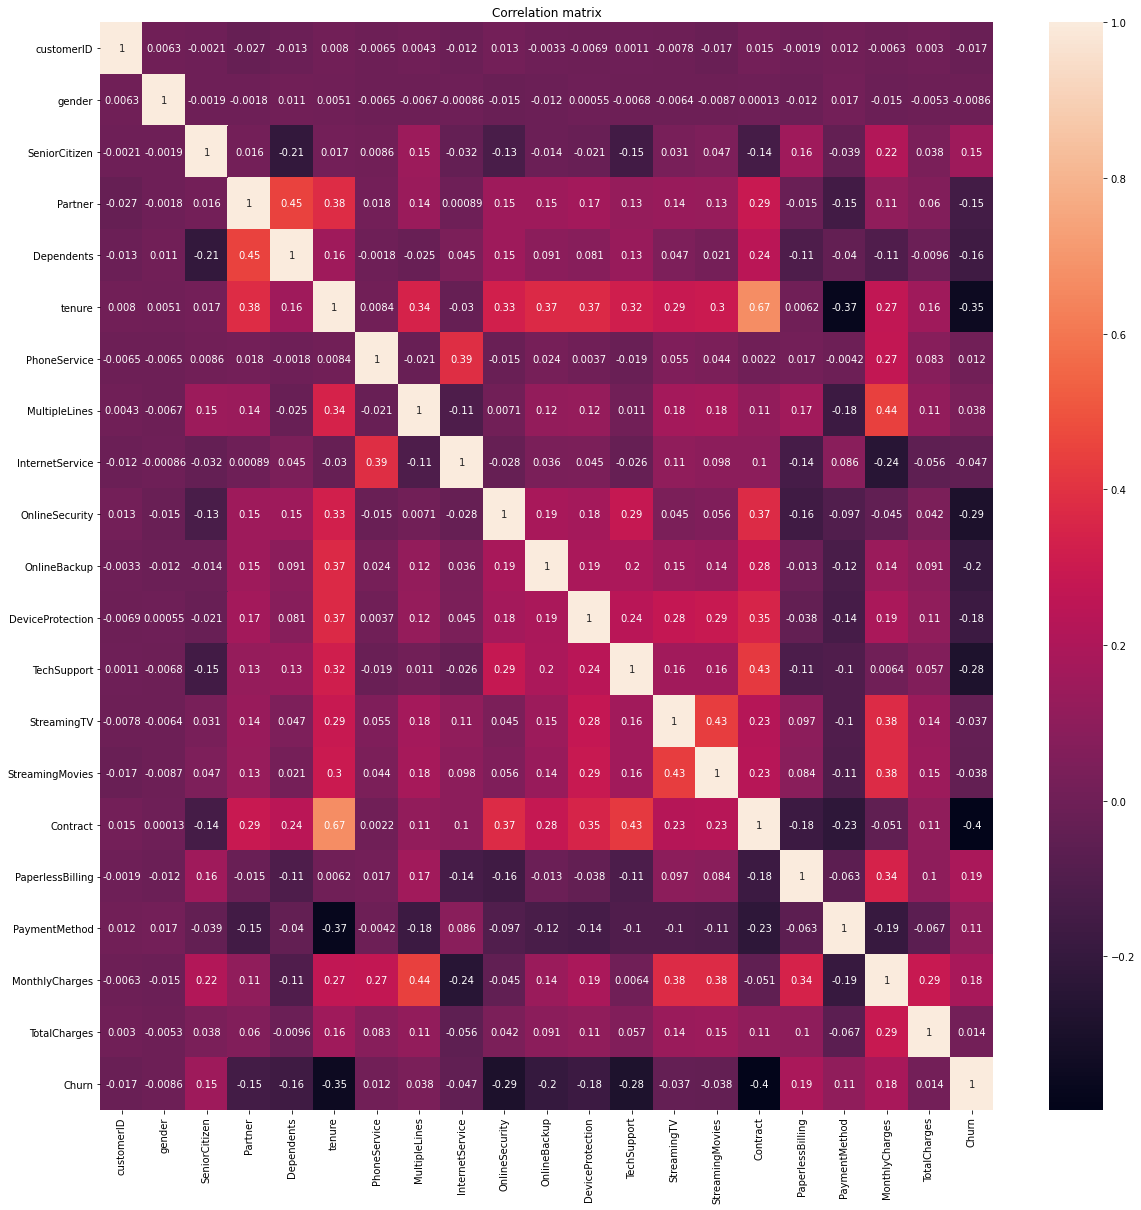

In [12]:
#plotting graph for correlation
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

we can clearly identify the correlation of columns among each other

In [13]:
corr_matrix=data.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.191825
MonthlyCharges      0.183523
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

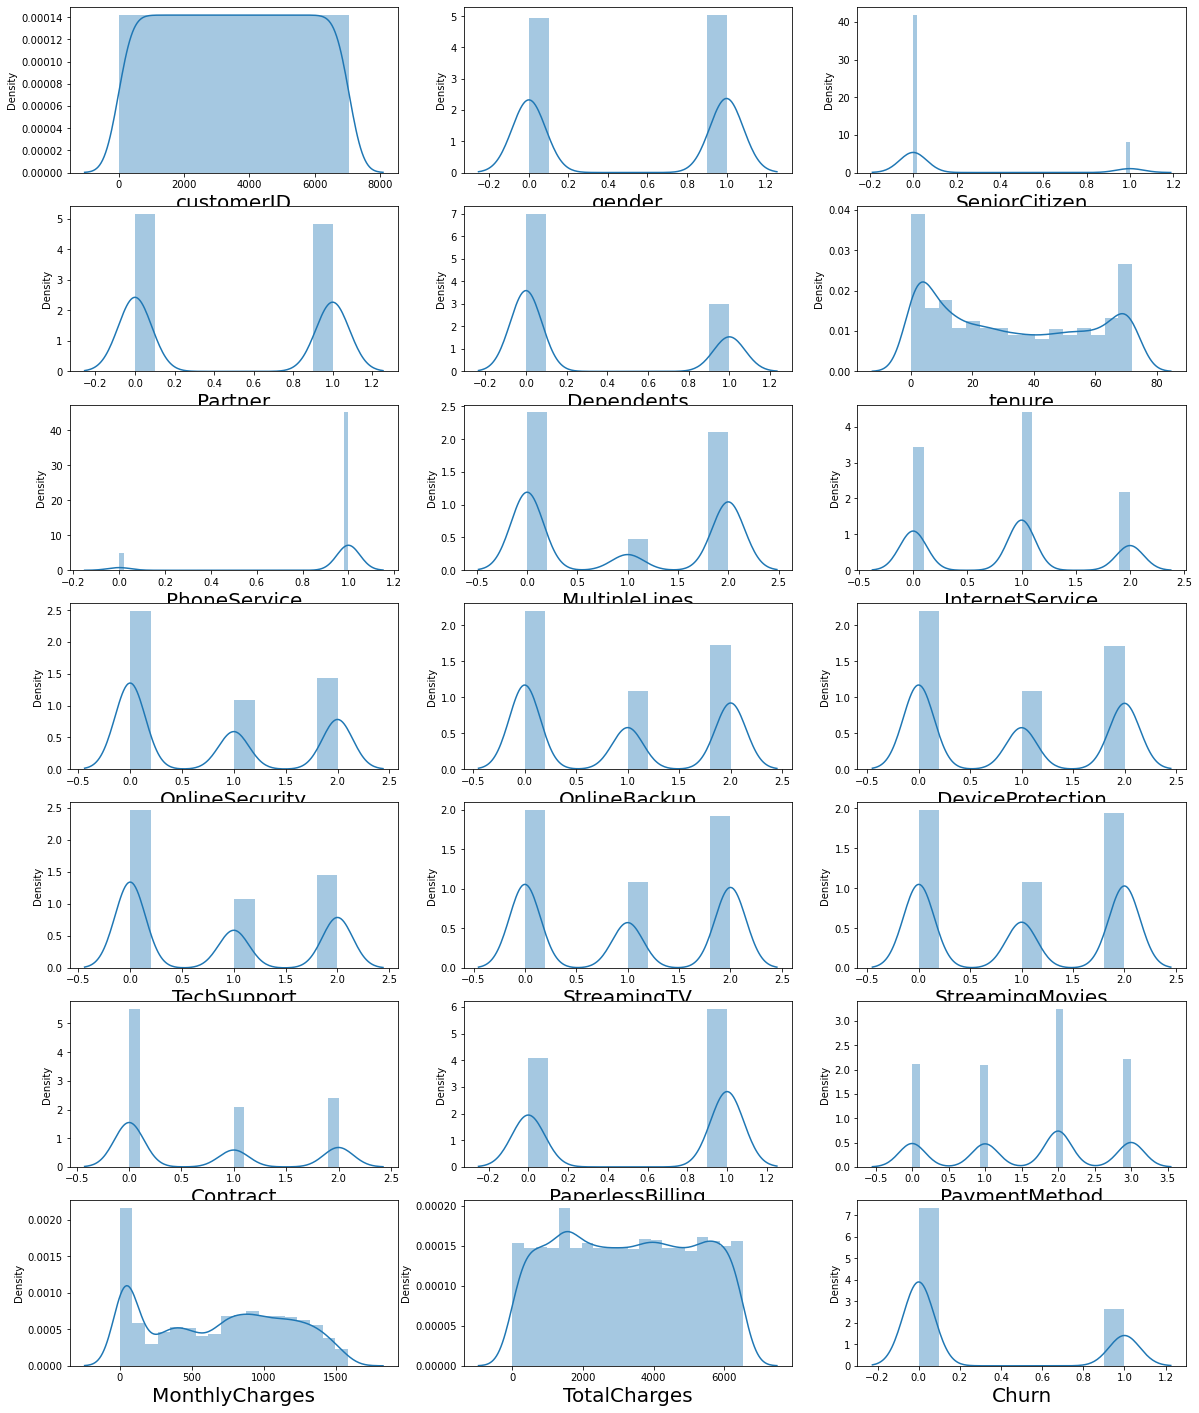

In [14]:
#let's check the data distribution among all the columns



plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# check skewness

In [15]:
x.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
gender             -0.019031
customerID          0.000000
MonthlyCharges      0.014263
StreamingMovies     0.014657
TotalCharges        0.015857
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
SeniorCitizen       1.833633
dtype: float64

skeweed columns are categorical so we are good to go

# check outliers

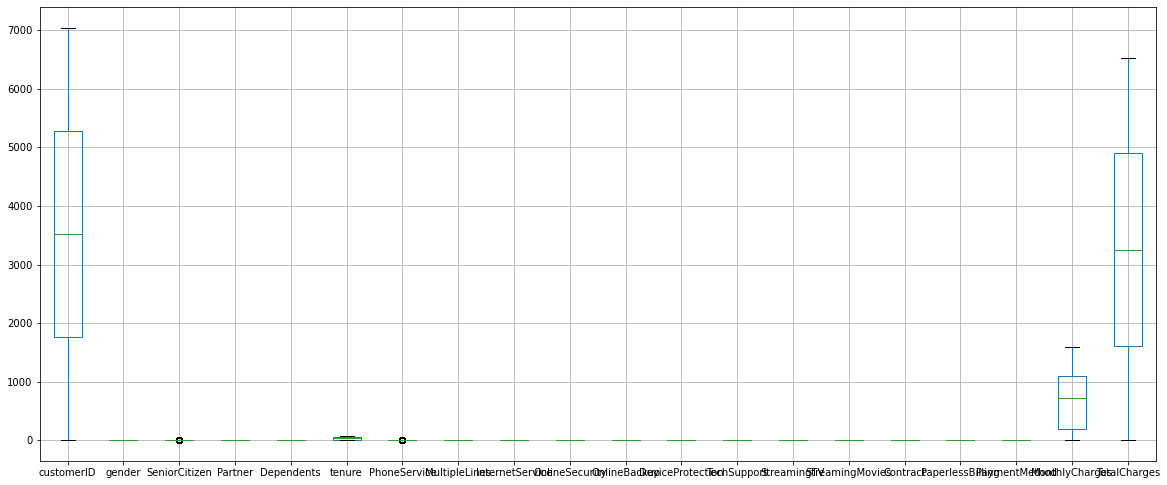

In [16]:
#plotting boxplot for columns
x.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

there is only one or two outliers so we can proceed further

before we fit our data to a model . let's visualize the relationship between our independent variables and the categories

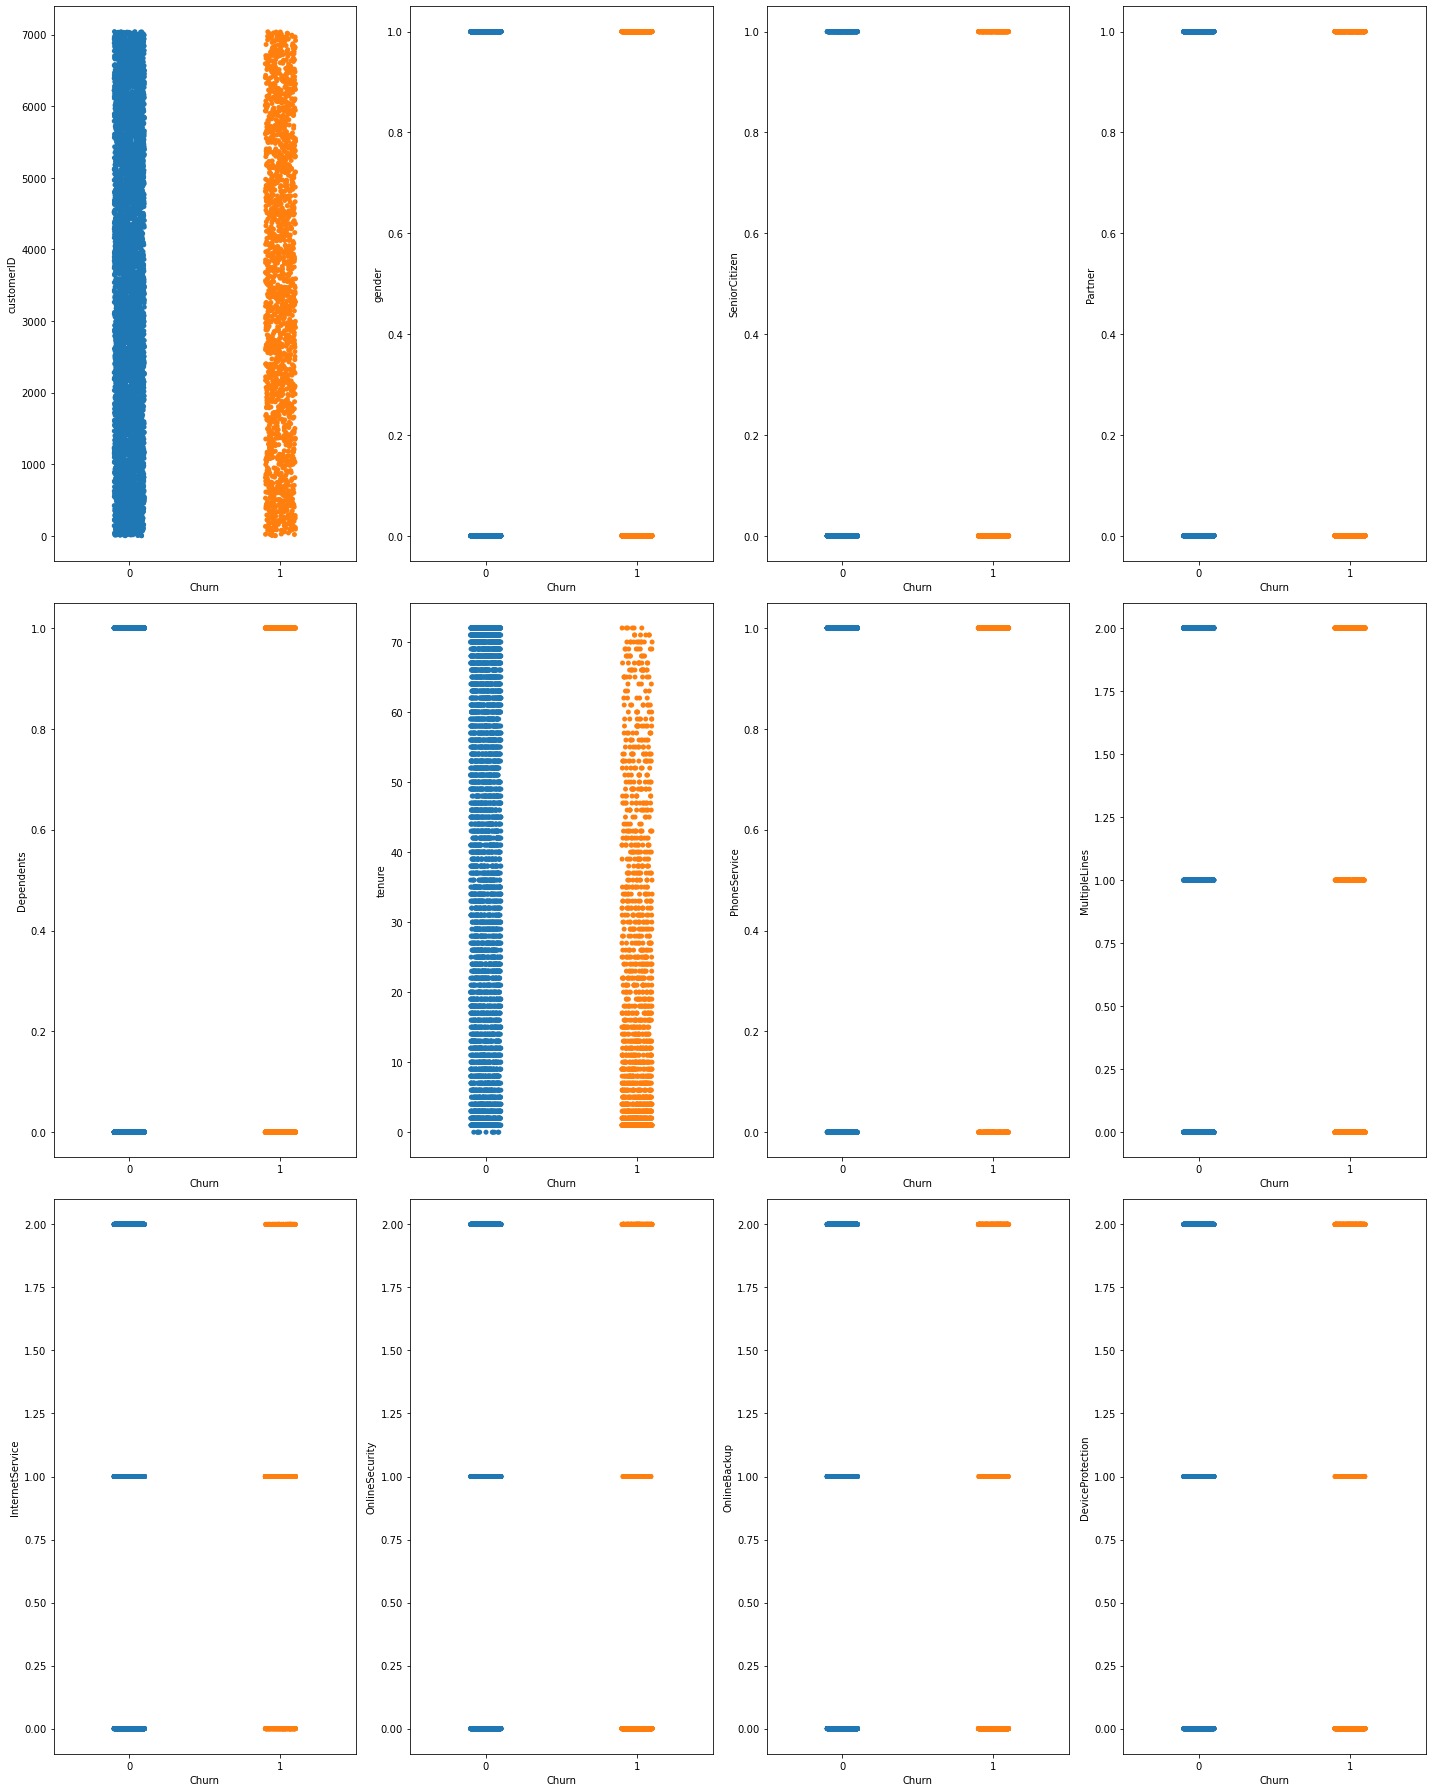

In [17]:
#let's see how features are related to class
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


great let's proceed by checking multicollinearity in the dependent variables. before that we should scale our data. let's use standard scalar for that

# Data Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [19]:
x_scaled

array([[ 0.91189045, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.13176632, -0.39860759],
       [ 0.21690598,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.38773977, -0.94876238],
       [-0.47070074,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.51731743, -1.64188328],
       ...,
       [-0.07574495, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.14221613, -0.13968008],
       [ 1.18683477,  0.99053183,  2.27315869, ...,  1.33486261,
         0.23297901, -0.31653445],
       [-0.63694614,  0.99053183, -0.43991649, ..., -1.47405205,
         1.4723266 ,  1.13801338]])

finding variance inflation factor in each scaled column i.e. x_scaled1

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.002433,customerID
1,1.001703,gender
2,1.149563,SeniorCitizen
3,1.461956,Partner
4,1.382171,Dependents
5,2.754878,tenure
6,1.595437,PhoneService
7,1.404516,MultipleLines
8,1.644252,InternetService
9,1.247278,OnlineSecurity


all the vif values are less than 5 and are very low. that means no multicollinearity. now, we can go ahead with fitting our data to the model. before that let's split our data in test and training set

# training process

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [22]:
#find best random state for train_test_split
maxAccu=0       #maximum accuracy
maxRS=0         #best random state

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on random_state",maxRS)

Best Accuracy is 0.8245315161839863 on random_state 24


# creating train test split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=24)

In [24]:
x_train

array([[ 1.10961427, -1.00955867, -0.43991649, ...,  1.33486261,
         0.4377953 ,  0.89073495],
       [-1.13568234,  0.99053183, -0.43991649, ...,  0.39855772,
         0.66978111, -0.70413148],
       [ 1.68360357,  0.99053183, -0.43991649, ...,  1.33486261,
        -1.37002201, -0.29535429],
       ...,
       [ 1.27241672,  0.99053183, -0.43991649, ...,  0.39855772,
         0.22879908,  0.09489025],
       [-0.96697769,  0.99053183, -0.43991649, ..., -0.53774716,
         1.02925461,  0.47983975],
       [-0.36446107, -1.00955867, -0.43991649, ...,  0.39855772,
         0.47750458, -0.73007718]])

In [25]:
x_test

array([[-0.4908666 ,  0.99053183,  2.27315869, ...,  0.39855772,
         1.52457566, -1.37554271],
       [-0.51004876,  0.99053183, -0.43991649, ..., -1.47405205,
         1.43679724,  1.0628238 ],
       [ 0.40380909, -1.00955867, -0.43991649, ...,  0.39855772,
         0.64888149, -1.36389362],
       ...,
       [-1.42390661,  0.99053183, -0.43991649, ...,  0.39855772,
         0.57155288, -1.0149504 ],
       [ 1.06190479, -1.00955867, -0.43991649, ...,  1.33486261,
        -1.36375213,  0.04405786],
       [ 1.32750395, -1.00955867, -0.43991649, ...,  1.33486261,
        -0.09514506,  0.74723934]])

In [26]:
y_train

2683    1
6712    0
3569    0
1910    0
5350    0
       ..
3473    1
343     0
6336    0
899     0
4514    0
Name: Churn, Length: 5282, dtype: int32

In [27]:
y_test

261     1
490     0
3026    1
6619    0
2677    1
       ..
6049    0
3170    0
4825    0
6645    0
6865    0
Name: Churn, Length: 1761, dtype: int32

# Logistic Regression

In [28]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 82.45315161839864
[[1204  116]
 [ 193  248]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1320
           1       0.68      0.56      0.62       441

    accuracy                           0.82      1761
   macro avg       0.77      0.74      0.75      1761
weighted avg       0.82      0.82      0.82      1761



# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 72.45883021010789
[[1055  265]
 [ 220  221]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1320
           1       0.45      0.50      0.48       441

    accuracy                           0.72      1761
   macro avg       0.64      0.65      0.64      1761
weighted avg       0.73      0.72      0.73      1761



# RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 80.465644520159
[[1196  124]
 [ 220  221]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1320
           1       0.64      0.50      0.56       441

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.79      0.80      0.80      1761



# SVC

In [31]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 72.45883021010789
[[1055  265]
 [ 220  221]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1320
           1       0.45      0.50      0.48       441

    accuracy                           0.72      1761
   macro avg       0.64      0.65      0.64      1761
weighted avg       0.73      0.72      0.73      1761



LogisticRegression ,RandomForestClassifier,SVC are producing good accuracy. now we will check cross validation score as well for overfitting

# cross validation

In [32]:
from sklearn.model_selection import cross_val_score
lr=cross_val_score(lr,x_scaled,y,cv=5)
print("Cross Validation Score of LogisticRegression :",lr.mean()*100)

Cross Validation Score of LogisticRegression : 80.32105901993675


In [33]:
scr2=cross_val_score(svc,x_scaled,y,cv=5)
print("Cross Validation Score ofSVC Model :",scr2.mean()*100)

Cross Validation Score ofSVC Model : 79.54020219046389


In [34]:
scr3=cross_val_score(rf,x_scaled,y,cv=5)
print("Cross Validation Score of Random Forest Model :",scr3.mean()*100)

Cross Validation Score of Random Forest Model : 79.27033598941867


All models are performing almost same so lets proceed for Hyper parameter tunning

# Hyper Parameter Tunning

In [35]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [36]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")

In [37]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2'}

In [38]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8165814877910278

# ROC AUC Plot

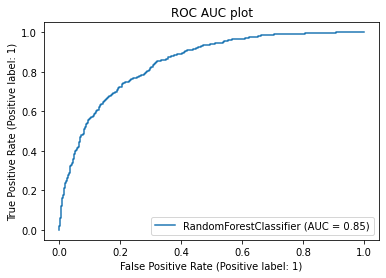

In [39]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# final accuracy is 81% and AUC score is 85% which is pretty good

# save model

In [40]:
#Pickeling of file or serialization of a file
import joblib
joblib.dump(GCV.best_estimator_,"Customer Churn Analysis.pkl")

['Customer Churn Analysis.pkl']